Подключаем библиотки.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Задание 1. Опорные объекты.

Загрузите выборку из файла svm-data.csv. В нем записана двумерная выборка (целевая переменная указана в первом столбце, признаки — во втором и третьем).

In [225]:
data = pd.read_csv('svm-data.csv', header=None)

y = data[0].copy().values
X = data[[1,2]].copy().as_matrix()

Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой.

In [227]:
from sklearn.svm import SVC
clf = SVC(C=100000, random_state=241, kernel='linear')
clf.fit(X,y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.

In [230]:
ans = ' '.join(map(lambda x: str(x), clf.support_+1))

print(ans)

with open('3_1.txt', 'w') as out_f:
    out_f.write(ans)

4 5 10


# Additional tasks for better understanding.

In this task we take a closer look at **margins** and **2D SVM algorithm visualization** on iris dataset. 

About SVM you could read more by click on this link [here](http://scikit-learn.org/stable/modules/svm.html). 

In the same time read more about SVM parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

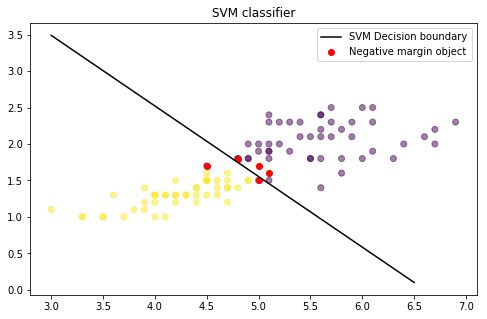

IDs of support vectors are : 56, 69, 71, 73, 76, 77, 83, 84, 88, 92, 96, 99, 0, 2, 4, 6, 13, 20, 22, 26, 27, 33, 35, 36


In [169]:
from sklearn.datasets import load_iris
from sklearn import svm

iris = load_iris()
mask = iris.target != 0
X = iris.data[mask,2:4]
# Targets are choosen now from Y = {+1, -1} [For margins]
y = iris.target[mask]
y[y == 2] = -1

clf = svm.SVC(kernel='linear', random_state=241)
clf.fit(X, y)

w0 = clf.intercept_[0]
w1, w2 = clf.coef_[0]
k, b = -w1/w2, -w0/w2

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X[:,0], X[:,1],c=y, alpha = 0.5)

x = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.5)
ax.plot(x, k*x+b, 'k', label = 'SVM Decision boundary')
ax.set_title('SVM classifier')

# Deal with margins
margins = y *(np.sum(X * clf.coef_, axis=1) + w0)
neg_marg = margins < 0.

plt.scatter(X[neg_marg, 0], X[neg_marg, 1], color = 'red', label='Negative margin object')


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

# Ids of support vectros in this task
print('IDs of support vectors are : {0}'.format(', '.join(map(lambda x : str(x), clf.support_))))

** ONE advantige of SVM usage - possibility to chose different kernels. **

Kernels could be several, but the all must be good in terms of scalar product in spaces of higher dimension:
 - Linear (good for linear separation).
 - Sigmioid (good for linear separation).
 - Polynomial (good for linear separation, but with several point on the area of another class).
 - RBF (Gaussian kernel) - good for circle like areas.

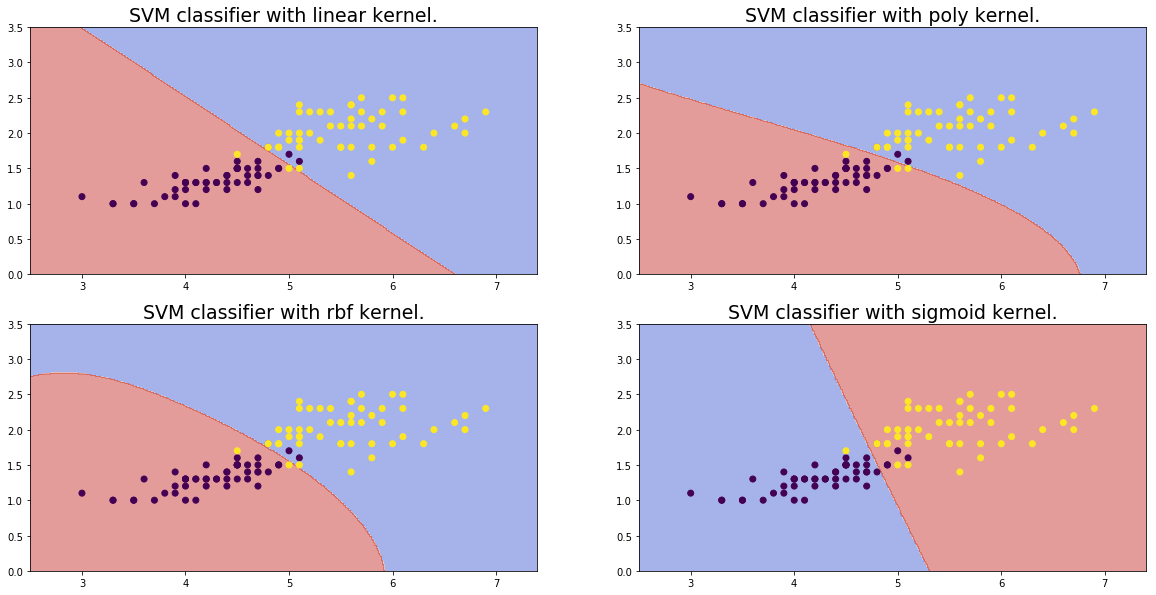

In [137]:
# Check number of points and specify investigation area
area = [400, 300]
x_ = np.linspace(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, area[0])
y_ = np.linspace(0., 3.5, area[1])
X_test = np.array([[i, j] for i in x_ for j in y_])

# Kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Plot heatmaps for each kernel in list
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ids = [[i, j] for i in [0, 1] for j in [0, 1]]

for i in range(len(kernels)):
    clf = svm.SVC(kernel=kernels[i], random_state=241)
    clf.fit(X, y)
    y_test = clf.predict(X_test)
    y_test = y_test.reshape(area[0], area[1])
    
    ax[ids[i][0], ids[i][1]].contourf(x_, y_, y_test.T, cmap=plt.cm.coolwarm, alpha=0.5)
    ax[ids[i][0], ids[i][1]].scatter(X[:,0], X[:,1],c=iris.target[mask])
    ax[ids[i][0], ids[i][1]].set_title('SVM classifier with ' + kernels[i] + ' kernel.', fontsize=19)

plt.show()

** IMPORTANT ROLE IN SVM plays C constant - it determines width of decision boundady **

Example below illustrates SVM classifing with RBF kernel, for different C constant values. 

From the pictures below we can notise, that: high C corresponds to higher width of desicion boundary.

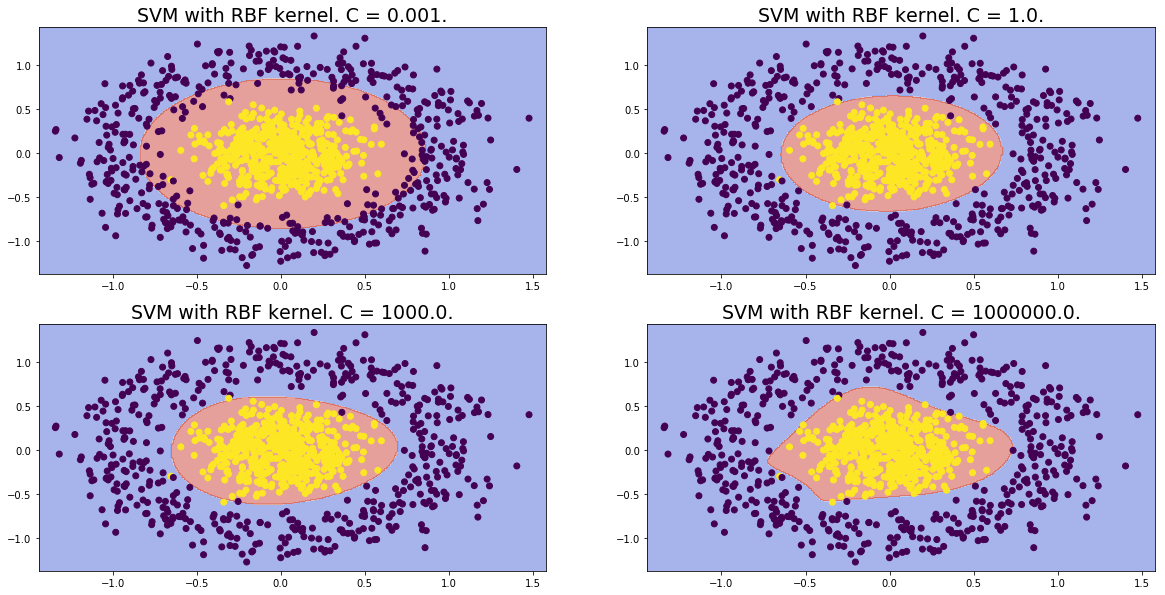

In [167]:
from sklearn.datasets import make_circles
# Create train data
np.random.seed(0)
X, y = make_circles(n_samples=1000, factor=.25, noise=.15)

# Create test area near train data
area = [400, 300]
x_ = np.linspace(np.min(X[:,0])-0.1, np.max(X[:,0])+0.1, area[0])
y_ = np.linspace(np.min(X[:,1])-0.1, np.max(X[:,1])+0.1, area[1])
X_test = np.array([[i, j] for i in x_ for j in y_])

C_ = [0.001, 1., 1000., 1000000.]

ids = [[i, j] for i in [0, 1] for j in [0, 1]]

fig, ax = plt.subplots(2,2, figsize=(20, 10))

for i in range(len(kernels)):
    clf = svm.SVC(C = C_[i], kernel='rbf', random_state=241)
    clf.fit(X, y)
    y_test = clf.predict(X_test)
    y_test = y_test.reshape(area[0], area[1])
    
    ax[ids[i][0], ids[i][1]].contourf(x_, y_, y_test.T, cmap=plt.cm.coolwarm, alpha=0.5)
    ax[ids[i][0], ids[i][1]].scatter(X[:,0], X[:,1],c=y)
    ax[ids[i][0], ids[i][1]].set_title('SVM with RBF kernel. C = {}.'.format(C_[i]), fontsize=19)
plt.show()


## Задание 2. Анализ текстов.

Загрузите объекты из новостного датасета 20 newsgroups, относящиеся к категориям "космос" и "атеизм" (инструкция приведена выше). Обратите внимание, что загрузка данных может занять несколько минут.

In [231]:
from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании мы предлагаем вам вычислить TF-IDF по всем данным. При таком подходе получается, что признаки на обучающем множестве используют информацию из тестовой выборки — но такая ситуация вполне законна, поскольку мы не используем значения целевой переменной из теста. 
На практике нередко встречаются ситуации, когда признаки объектов тестовой выборки известны на момент обучения, и поэтому можно ими пользоваться при обучении алгоритма.

In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer

features = newsgroups.data
y = newsgroups.target

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(features)

word_weigth = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

# Additional: prtint word with appropriate freq
#for index in word_weigth:
#    print('{0} : {1}'.format(index, word_weigth[index]))

Подберите минимальный лучший параметр C из множества [10^-5, 10^-4, ... 10^4, 10^5] для SVM с линейным ядром (kernel='linear') при помощи кросс-валидации по 5 блокам. Укажите параметр random_state=241 и для SVM, и для KFold. В качестве меры качества используйте долю верных ответов (accuracy).

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid = {'C': np.power(10.0, np.arange(-5, 6))}

cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(vectorizer.transform(features), y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [117]:
for a in gs.grid_scores_:
    print('{0} : {1}'.format( a.mean_validation_score, a.parameters))

0.552631578947 : {'C': 1.0000000000000001e-05}
0.552631578947 : {'C': 0.0001}
0.552631578947 : {'C': 0.001}
0.552631578947 : {'C': 0.01}
0.950167973124 : {'C': 0.10000000000000001}
0.993281075028 : {'C': 1.0}
0.993281075028 : {'C': 10.0}
0.993281075028 : {'C': 100.0}
0.993281075028 : {'C': 1000.0}
0.993281075028 : {'C': 10000.0}
0.993281075028 : {'C': 100000.0}


C:\Users\Alexey\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Обучите SVM по всей выборке с оптимальным параметром C, найденным на предыдущем шаге.

In [5]:
best_id = gs.best_index_
C_best = np.power(10.0, np.arange(-5, 6))[best_id]
print('C best = {0}'.format(C_best))

clf_best = SVC(C=C_best, kernel='linear', random_state=241)
clf_best.fit(vectorizer.transform(features), y)

C best = 1.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

Найдите 10 слов с наибольшим абсолютным значением веса.
Они являются ответом на это задание. Укажите эти слова через запятую или пробел, в нижнем регистре, в лексикографическом порядке.

In [119]:
words = vectorizer.get_feature_names()
coef = pandas.DataFrame(clf_best.coef_.data, clf_best.coef_.indices)
top_words = coef[0].map(lambda w: abs(w)).sort_values(ascending=False).head(10).index.map(lambda i: words[i])
top_words.sort()

ans = np.sort(top_words)

print(ans)

with open('3_2.txt', 'w') as out_f:
    out_f.write(','.join(ans))

[u'atheism' u'atheistic' u'biased' u'god' u'keeping' u'monuments' u'relies'
 u'schulte' u'skippy' u'space']


## Задание 3. Логистическая регрессия

Посмотерть подробнее можно [тут](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture05-linclass.pdf).

Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.

In [128]:
from scipy.special import expit
from sklearn.metrics import roc_auc_score

data = pd.read_csv('data-logistic.csv', header=None)
y = data[0].copy().as_matrix()
X = data[[1,2]].copy().as_matrix()

Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) логистической регрессии. 
Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0).

In [125]:
def weights_update(X, y, w, C, k):
    l = float(len(y))
    tmp = y*np.sum(np.multiply(X, w), axis=1)
    
    return w + k*np.sum(y*X.T*(1.-expit(tmp)), axis=1)/l - k*C*w


def grad(X, y, w = np.zeros(2), C=0., k=0.1, max_er=1e-5):
    cur_iter = 0
    max_iter = 100000
    w_new = w
    
    while cur_iter < max_iter:
        w_new = weights_update(X, y, w, C, k)
        er = np.sqrt(np.sum((w_new-w)**2))
        cur_iter = cur_iter + 1
        
        if er < max_er:
            return w_new
        else:
            w = w_new

    return w_new

Запустите градиентный спуск и доведите до сходимости (евклидово расстояние между векторами весов на соседних итерациях должно быть не больше 1e-5). Рекомендуется ограничить сверху число итераций десятью тысячами.

In [126]:
w_non_reg = grad(X, y)
w_reg = grad(X, y, C=10.)

Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании? Эти величины будут ответом на задание. В качестве ответа приведите два числа через пробел. Обратите внимание, что на вход функции roc_auc_score нужно подавать оценки вероятностей, подсчитанные обученным алгоритмом. Для этого воспользуйтесь сигмоидной функцией: a(x) = 1 / (1 + exp(-w1 x1 - w2 x2)).

In [127]:
y_score = expit(np.sum(np.multiply(X, w_non_reg), axis=1))
y_rscore = expit(np.sum(np.multiply(X, w_reg), axis=1))

auc = roc_auc_score(y, y_score)
rauc = roc_auc_score(y, y_rscore)

print('{:0.3f} {:0.3f}'.format(auc, rauc))

with open('3_3.txt', 'w') as out_f:
    out_f.write('{:0.3f} {:0.3f}'.format(auc, rauc))

0.927 0.936


### Additional tasks for better understanding.

Below I perform LogisticRegression calculation on **iris** dataset.

Choose 2 features and classity on 2 classes ( this was made is for separate plane visualization ).
- Calculate probability via finction and using obtainet weights.
- Categorial features !!! 

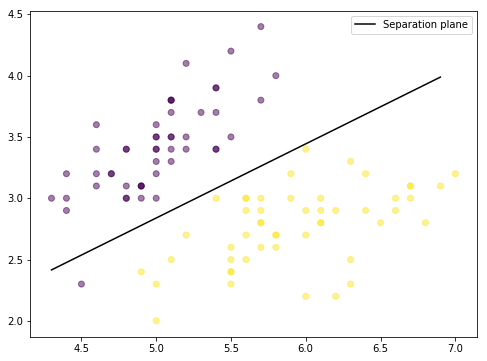

Probability using function:
P(y=0|x,w) = 0.512,  P(y=1|x,w) = 0.488
Probability without function (weights):
P(y=0|x,w) = 0.512,  P(y=1|x,w) = 0.488


In [212]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

from sklearn.datasets import load_iris

iris = load_iris()
mask = iris.target != 2
# Select two features and two targets for 2D visualization
X = iris.data[mask,:2]
y = iris.target[mask]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0], X[:, 1], c=y, alpha=0.5)

clf = LogisticRegression(C=1.5,random_state=241)
clf.fit(X, y)
# Obtain bias (w0) and weights for coefs calculation
w0 = clf.intercept_[0]
w1, w2 = clf.coef_[0]
# y = kx + b line
k, b = - w1/w2, -w0/w2

x = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.1)
ax.plot(x, k*x+b, color='k', label = 'Separation plane')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

# Probability of point calculation
point = [5.0, 2.85]
prob = clf.predict_proba([point])[0]
print('Probability using function:')
print('P(y=0|x,w) = {:0.3f},  P(y=1|x,w) = {:0.3f}'.format(prob[0], prob[1]))

print('Probability without function (weights):')
p = expit(np.sum((point * clf.coef_).ravel()) + w0)
print('P(y=0|x,w) = {:0.3f},  P(y=1|x,w) = {:0.3f}'.format(1-p, p))


** WRONG (but gives the main idea)** CDF plot for current dataset. 
- But this is not exactly the truth, because we need to plot a 3D model, because of 2 features.

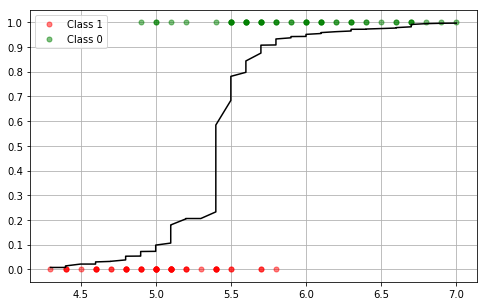

In [213]:
from scipy.special import expit
x = X[:,0]
mask_0 = y == 0
mask_1 = y == 1
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(x[mask_0], y[mask_0], 'ro', ms=5, alpha = 0.5, label = 'Class 1')
ax.plot(x[mask_1], y[mask_1], 'go', ms=5, alpha = 0.5, label = 'Class 0')
ax.grid('on')
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.plot(np.sort(x), np.sort(expit(np.sum(X*clf.coef_, axis=1) + w0)), color='k')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

## Задание 4. Метрики качества классификации.

Загрузите файл classification.csv. В нем записаны истинные классы объектов выборки (колонка true) и ответы некоторого классификатора (колонка pred).

In [134]:
data = pd.read_csv('classification.csv')
df_true = data['true'].copy()
df_pred = data['pred'].copy()

data.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


Заполните таблицу ошибок классификации:

In [221]:
TP =  ((data['true'] == 1) & (data['pred'] == 1)).value_counts()[1]
FP =  ((data['true'] == 0) & (data['pred'] == 1)).value_counts()[1]
FN =  ((data['true'] == 1) & (data['pred'] == 0)).value_counts()[1]
TN =  ((data['true'] == 0) & (data['pred'] == 0)).value_counts()[1]

ans0 = '{:} {:} {:} {:}'.format(TP, FP, FN, TN)

print(ans0)

with open('3_4_0.txt', 'w') as out_f:
    out_f.write(ans0)

43 34 59 64


Посчитайте основные метрики качества классификатора:

- Accuracy (доля верно угаданных) — sklearn.metrics.accuracy_score
- Precision (точность) — sklearn.metrics.precision_score
- Recall (полнота) — sklearn.metrics.recall_score
- F-мера — sklearn.metrics.f1_score

In [213]:
import sklearn.metrics

accuracy = sklearn.metrics.accuracy_score(df_true, df_pred)
precision = sklearn.metrics.precision_score(df_true, df_pred)
recall = sklearn.metrics.recall_score(df_true, df_pred)
f_measure = sklearn.metrics.f1_score(df_true, df_pred)

ans1 = '{:0.3f} {:0.3f} {:0.3f} {:0.3f}'.format(accuracy, precision, recall, f_measure)
print(ans1)
with open('3_4_1.txt', 'w') as out_f:
    out_f.write(ans1)

0.535 0.558 0.422 0.480


Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы и значения степени принадлежности положительному классу для каждого классификатора на некоторой выборке:
- для логистической регрессии — вероятность положительного класса (колонка score_logreg),
- для SVM — отступ от разделяющей поверхности (колонка score_svm),
- для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
- для решающего дерева — доля положительных объектов в листе (колонка score_tree).

In [172]:
df_scores = pd.read_csv('scores.csv')
df_scores.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


Посчитайте площадь под ROC-кривой для каждого классификатора. Какой классификатор имеет наибольшее значение метрики AUC-ROC (укажите название столбца)?

In [180]:
from sklearn.metrics import roc_auc_score

roc_val = np.zeros(4)
roc_val[0] = roc_auc_score(df_scores['true'], df_scores['score_logreg'])
roc_val[1] = roc_auc_score(df_scores['true'], df_scores['score_svm'])
roc_val[2] = roc_auc_score(df_scores['true'], df_scores['score_knn'])
roc_val[3] = roc_auc_score(df_scores['true'], df_scores['score_tree'])

ans2 = df_scores.columns.values[roc_val.argmax()+1] # Because of 'true' column
print(ans2)

with open('3_4_2.txt', 'w') as out_f:
    out_f.write(ans2)

score_logreg


Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) не менее 70% ?

In [224]:
from sklearn.metrics import precision_recall_curve

prec = []
for cur_alg in df_scores.columns.values[1:]:
    precisions = precision_recall_curve(df_scores['true'], df_scores[cur_alg])
    prec.append(np.max(precisions[0][precisions[1] >= 0.7] ))

ans3 = df_scores.columns.values[(np.array(prec).argmax() + 1)]

print(ans3)

with open('3_4_3.txt', 'w') as out_f:
    out_f.write(ans3)

score_tree
